In [ ]:
!pip install yfinance
!pip install matplotlib
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import json
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
apple=yf.Ticker("AAPL")

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2025-01-15 05:32:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-01-15 05:32:41 (1.24 GB/s) - ‘apple.json’ saved [5699/5699]



In [ ]:
with open('apple.json') as pro_1:
  apple_data=json.load(pro_1)
apple_data

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [ ]:
apple_data['country']

'United States'

In [ ]:
apple_price=apple.history(period='max')

In [ ]:
apple_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


In [ ]:
apple_price.size

77791

In [ ]:
apple_price.reset_index(inplace=True)
apple_price.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1,1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
2,2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
3,3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
4,4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


<Axes: xlabel='Date'>

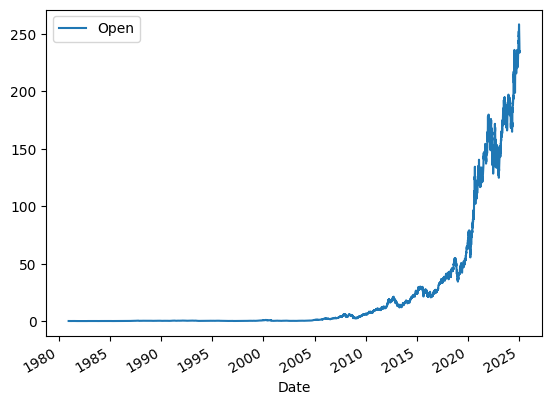

In [ ]:
apple_price.plot(x="Date",y="Open")

<Axes: xlabel='Date'>

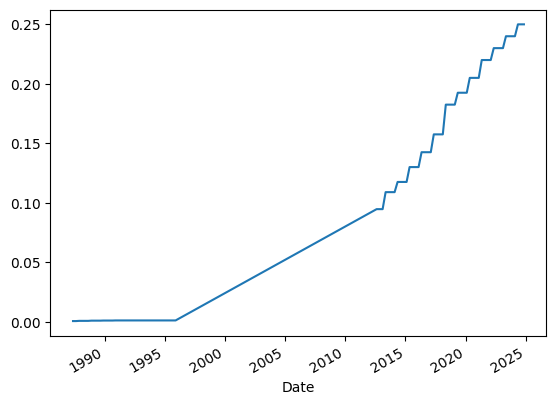

In [ ]:
apple.dividends
apple.dividends.plot()

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [ ]:
data=requests.get(url).text

In [ ]:
soup=bs(data,'html.parser')

In [ ]:
netflix_data=pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])
netflix_data

,Date,Open,High,Low,Close,Volume


In [ ]:
for row in soup.find('tbody').find_all('tr'):
  col=row.find_all('td')
  date=col[0].text
  open=col[1].text
  high=col[2].text
  low=col[3].text
  close=col[4].text
  adj_close=col[5].text
  volume=col[6].text

In [ ]:
netflix_data=pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)
netflix_data.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Sep 01, 2015",109.35,111.24,93.55,103.26,"497,401,200",103.26
1,"Sep 01, 2015",109.35,111.24,93.55,103.26,"497,401,200",103.26
2,"Sep 01, 2015",109.35,111.24,93.55,103.26,"497,401,200",103.26


In [ ]:
pandas_data=pd.read_html(url)

In [ ]:
pandas_data=pd.read_html(str(soup))

<ipython-input-37-344c9bf368f7>:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pandas_data=pd.read_html(str(soup))


In [ ]:
pd_netflix=pandas_data[0]
pd_netflix.head(5)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


** Final Assignment

In [ ]:
!pip install plotly pandas

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
tesla=yf.Ticker('TSLA')

In [ ]:
tesla_data=tesla.history(period='max')

In [ ]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text

In [ ]:
soup=bs(html_data,"html.parser")

In [ ]:
Table = soup.find("table")
tesla_revenue = pd.read_html(str(Table))[0]
tesla_revenue.columns = ["Date", "Revenue"]

# Step 8: Clean the Revenue Column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)  # Remove commas and dollar signs
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

<ipython-input-56-4220639b1c51>:2: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [ ]:
tesla_revenue.head()

,Date,Revenue
0,1970-01-01 00:00:00.000002021,53823
1,1970-01-01 00:00:00.000002020,31536
2,1970-01-01 00:00:00.000002019,24578
3,1970-01-01 00:00:00.000002018,21461
4,1970-01-01 00:00:00.000002017,11759


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [ ]:
tesla_revenue.tail(5)

,Date,Revenue
8,1970-01-01 00:00:00.000002013,2013
9,1970-01-01 00:00:00.000002012,413
10,1970-01-01 00:00:00.000002011,204
11,1970-01-01 00:00:00.000002010,117
12,1970-01-01 00:00:00.000002009,112


In [ ]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data Graph')

<ipython-input-54-fa843a421e2e>:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

<ipython-input-54-fa843a421e2e>:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [ ]:
gme=yf.Ticker("GME")

In [ ]:
gme_data=gme.history(period='max')

In [ ]:
gme_data.reset_index(inplace=True)
gme_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5763,2025-01-07 00:00:00-05:00,32.799999,34.400002,31.709999,33.369999,13360700,0.0,0.0
5764,2025-01-08 00:00:00-05:00,32.970001,33.369999,32.410000,32.959999,6320000,0.0,0.0
5765,2025-01-10 00:00:00-05:00,32.500000,32.939999,31.400000,32.310001,7068200,0.0,0.0
5766,2025-01-13 00:00:00-05:00,31.600000,31.799999,30.900000,31.020000,5567000,0.0,0.0


In [ ]:
url=" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2=requests.get(url).text

In [ ]:
soup=bs(html_data_2,'html.parser')

In [ ]:
table = soup.find("table")
gme_revenue = pd.read_html(str(table))[0]
gme_revenue.columns = ["Date", "Revenue"]

# Step 8: Clean the Revenue Column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)  # Remove commas and dollar signs
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

<ipython-input-65-0d250f026cc7>:2: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [ ]:
print(gme_revenue.head())


                           Date  Revenue
0 1970-01-01 00:00:00.000002020     6466
1 1970-01-01 00:00:00.000002019     8285
2 1970-01-01 00:00:00.000002018     8547
3 1970-01-01 00:00:00.000002017     7965
4 1970-01-01 00:00:00.000002016     9364


In [ ]:
gme_revenue.tail()

,Date,Revenue
11,1970-01-01 00:00:00.000002009,8806
12,1970-01-01 00:00:00.000002008,7094
13,1970-01-01 00:00:00.000002007,5319
14,1970-01-01 00:00:00.000002006,3092
15,1970-01-01 00:00:00.000002005,1843


In [ ]:
make_graph(gme_data, gme_revenue, 'GameStop')

<ipython-input-54-fa843a421e2e>:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

<ipython-input-54-fa843a421e2e>:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

